# Overview of the project

The goal of the project is to design online learning algorithms to handle a marketing
campaing to sell products. This includes:
- An advertising campaign
- A pricing problem

## Overview of the interaction

At each day:
1. The company chooses a price p
2. The company faces a sequence of auctions. For each auction:
    1. The company chooses a bid b
    2. A slot is (possibly) assigned to the company depending on b, the competing bids, and the auction format
    3. If the ad is clicked, an user visit the company web page
    4. The user buy the company product with a probability that depends on the price p

# Requirement 1: stochastic environment

Build a stochastic environment. At an high level, it should include:
- A distribution over the bids of the other agents (Done)
- A function specifying the probability with which an user buys for every price (Done)

Build a pricing strategy using the continuous set of prices $p \in [0,1]$ and Gaussian Processes

Consider a sequence of second-price auctions. Build two learning algorithms to deal with the bidding problem:
- A primal-dual algorithm for truthful auctions
- A UCB-like algorithm

Run the algorithms separately. Then, run the algorithms together. Keep in mind that the number of customers seeing the price depends on the advertising campaign.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

In [2]:
class Auction:
    def __init__(self, *args, **kwargs):
        pass

    def get_winners(self, bids):
        pass

    def get_payments_per_click(self, winners, values, bids):
        pass

    def round(self, bids):
        winners, values = self.get_winners(bids) # allocation mechanism!
        payments_per_click = self.get_payments_per_click(winners, values, bids)
        return winners, payments_per_click


In [3]:
class SecondPriceAuction(Auction):
    def __init__(self, ctrs):
        self.ctrs = ctrs
        self.n_adv = len(self.ctrs)
    
    def get_winners(self, bids):
        adv_values = self.ctrs*bids
        adv_ranking = np.argsort(adv_values)
        winner = adv_ranking[-1]
        return winner, adv_values
    
    def get_payments_per_click(self, winners, values, bids):
        adv_ranking = np.argsort(values)
        second = adv_ranking[-2]
        payment = values[second]/self.ctrs[winners]
        return payment.round(2)

In [4]:
np.random.seed(42)
n_advertisers = 3
n_users = 1000

other_bids = np.random.uniform(0, 1, size = (n_advertisers, n_users))

m_t = other_bids.max(axis=0) ## highest bid at each round
m_t[:50]

array([0.37454012, 0.95071431, 0.90625458, 0.73222489, 0.80656115,
       0.75939826, 0.69227656, 0.86617615, 0.60111501, 0.70807258,
       0.22120944, 0.98766801, 0.94405934, 0.21233911, 0.70557517,
       0.92524832, 0.34734333, 0.89983335, 0.9154883 , 0.66378969,
       0.96339443, 0.56016818, 0.93682246, 0.97105825, 0.94426649,
       0.78517596, 0.86204265, 0.98129709, 0.59241457, 0.82891547,
       0.60754485, 0.59626988, 0.46393249, 0.97200533, 0.96563203,
       0.80839735, 0.33987496, 0.72476677, 0.68423303, 0.44015249,
       0.85061606, 0.79072316, 0.52339091, 0.9093204 , 0.88597775,
       0.7228143 , 0.31171108, 0.7078351 , 0.87009887, 0.18485446])

In [5]:
def user_purchase_probability(price):
    # Parameters of the Gaussian Process
    amplitude = 1
    width = 0.7

    return amplitude * np.exp(-((price) / width) ** 2)

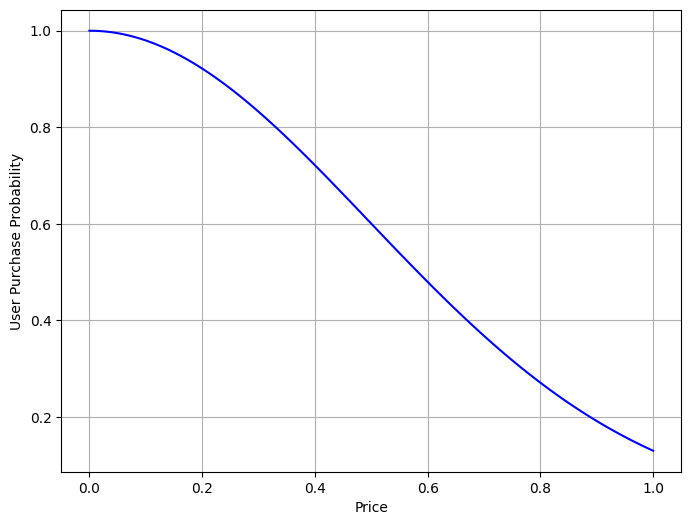

In [6]:
price_values = np.linspace(0, 1, 100)

purchase_probs = [user_purchase_probability(p) for p in price_values]

# Plot the user purchase probability function
plt.figure(figsize=(8, 6))
plt.plot(price_values, purchase_probs, color='blue')
plt.xlabel('Price')
plt.ylabel('User Purchase Probability')
plt.grid(True)
plt.show()